In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv',index_col='Unnamed: 0')

In [3]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [4]:
train.iloc[:,-1].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [5]:
train['count_families']=train['count_families'].astype('int16')

In [6]:
row=[]
for i in train:
    row.append([i,str(train[i].dtype),train[i].isna().sum(),
               round(train[i].isna().sum()/len(train[i])*100,2),
               train[i].nunique(),train[i].sample(2).values])
    
df_feature=pd.DataFrame(row,columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])
df_feature

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,building_id,int64,0,0.0,260601,"[53802, 931092]"
1,geo_level_1_id,int64,0,0.0,31,"[27, 3]"
2,geo_level_2_id,int64,0,0.0,1414,"[64, 1138]"
3,geo_level_3_id,int64,0,0.0,11595,"[5220, 10846]"
4,count_floors_pre_eq,int64,0,0.0,9,"[2, 2]"
5,age,int64,0,0.0,42,"[35, 30]"
6,area_percentage,int64,0,0.0,84,"[6, 6]"
7,height_percentage,int64,0,0.0,27,"[8, 6]"
8,land_surface_condition,object,0,0.0,3,"[t, t]"
9,foundation_type,object,0,0.0,5,"[i, r]"


In [7]:
X=train.drop(['building_id','damage_grade'],axis=1)
y=train['damage_grade']

In [8]:
numeric = []
for i in train.columns:
    if train[i].dtype !='object':
        numeric.append(i)

In [9]:
objects = []
for i in train.columns:
    if train[i].dtype =='object':
        objects.append(i)

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer,LabelEncoder

In [11]:
scaler=StandardScaler()

In [12]:
X_scaled=scaler.fit_transform(X[['age','area_percentage','height_percentage']])
X_scale=pd.DataFrame(X_scaled)
X_scale.columns=['age','area_percentage','height_percentage']

In [13]:
encoder = LabelEncoder()

In [14]:
X_encode = X[objects].apply(encoder.fit_transform)
X_encode = pd.DataFrame(X_encode)
X_encode.columns = objects

In [15]:
X[['age','area_percentage','height_percentage']]=X_scale
X[objects]=X_encode

In [16]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,0.047100,-0.459460,-0.226419,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,-0.224765,-0.004110,0.816109,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,-0.224765,-0.687135,-0.226419,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,-0.224765,-0.459460,-0.226419,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,0.047100,-0.004110,1.858636,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modeling with LGBM

In [18]:
from lightgbm import LGBMClassifier

In [19]:
lgbm=LGBMClassifier(max_depth=18,n_estimators=800,num_leaves=18,random_state=101,learning_rate=.4,objective='multiclass',min_child_samples=1000)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=18,
               min_child_samples=1000, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=800, n_jobs=-1, num_leaves=18,
               objective='multiclass', random_state=101, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [22]:
from sklearn.metrics import f1_score

In [23]:
def f1_score_table(X_train,y_train,X_test,y_test,model):
    score = []
    train_score = f1_score(y_train,model.predict(X_train),average='micro')
    test_score = f1_score(y_test,model.predict(X_test),average='micro')
    score.append([train_score,test_score])
    return pd.DataFrame(score,columns=['train_score','test_score'])

In [24]:
f1_score_table(X_train,y_train,X_test,y_test,lgbm)

,train_score,test_score
0,0.772772,0.736714


In [25]:
from eli5.lightgbm import explain_weights_lightgbm
explain_weights_lightgbm(lgbm,top=20)

Using TensorFlow backend.


Weight,Feature
0.3445,geo_level_1_id
0.1554,geo_level_2_id
0.0829,geo_level_3_id
0.0761,has_superstructure_mud_mortar_stone
0.0719,roof_type
0.0516,age
0.0499,foundation_type
0.0277,has_superstructure_cement_mortar_brick
0.0231,area_percentage
0.0181,height_percentage


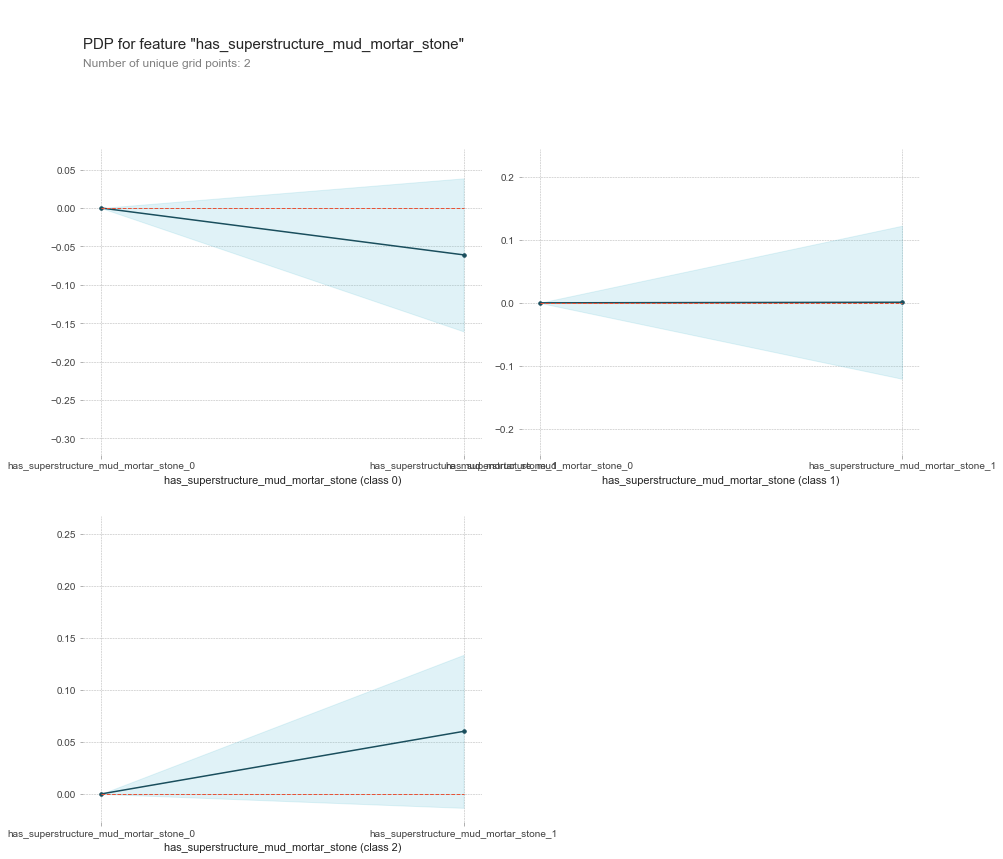

In [26]:
from pdpbox import pdp, info_plots

base_features = X_train.columns.values.tolist()
# base_features.remove('target')

feat_name = 'has_superstructure_mud_mortar_stone'
pdp_dist = pdp.pdp_isolate(model=lgbm, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### Cross Validation

In [27]:
from sklearn.model_selection import KFold
k=5
kf=KFold(n_splits=k,shuffle=True,random_state=101)

In [28]:
def calc_train_error(X_train,y_train,model):
    preds=model.predict(X_train)
    f1=f1_score(y_train,preds,average='micro')
    return {'f1':f1}

def calc_validation_error(X_test,y_test,model):
    preds=model.predict(X_test)
    f1=f1_score(y_test,preds,average='micro')
    return {'f1':f1}

def calc_metrics(X_train, y_train, X_test,y_test,model):
    model.fit(X_train,y_train)
    train_error=calc_train_error(X_train,y_train,model)
    validation_error=calc_validation_error(X_test,y_test,model)
    return train_error,validation_error

In [29]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(X,y):
    
    X_train,X_val=X.iloc[train_index],X.iloc[val_index]
    y_train,y_val=y.iloc[train_index],y.iloc[val_index]
    
    
    train_error,val_error=calc_metrics(X_train,y_train,X_val,y_val,lgbm)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [30]:
iterasi=[]
for i,j in zip(train_errors,validation_errors):
    iterasi.append([i['f1'],j['f1']])

index=['Iterasi {}'.format(i) for i in range(1,k+1,1)]
col=['train_f1','val_f1']

calc_matrix=pd.DataFrame(iterasi,index=index,columns=col)

average=[]
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())

std=[]
for i in calc_matrix.columns:
    std.append(calc_matrix[i].std())

calc_matrix.loc['Average']=average
calc_matrix.loc['Deviation']=std
calc_matrix

,train_f1,val_f1
Iterasi 1,0.771211,0.738627
Iterasi 2,0.770535,0.739275
Iterasi 3,0.770842,0.736992
Iterasi 4,0.771053,0.738718
Iterasi 5,0.770948,0.737663
Average,0.770918,0.738255
Deviation,0.000253,0.000914


### Create Submission File

In [31]:
test=pd.read_csv('test_values.csv')

In [32]:
test_scaled = scaler.fit_transform(test[['age','area_percentage','height_percentage']])
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = ['age','area_percentage','height_percentage']

In [33]:
test_encode = test[objects].apply(encoder.fit_transform)
test_encode = pd.DataFrame(test_encode)
test_encode.columns = objects

In [34]:
test[['age','area_percentage','height_percentage']] = test_scaled
test[objects] = test_encode

In [35]:
preds = lgbm.predict(test.drop('building_id',axis=1))

In [36]:
subs=pd.read_csv('test_values.csv')
sub=pd.DataFrame()
sub['building_id']=subs['building_id']
sub['damage_grade']=preds
sub[['building_id','damage_grade']].to_csv('submission.csv',index=False)

In [37]:
sub.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
